## A PyTorch Workflow

In [1]:
Topics = {1: "data (preparing and loaing)",
          2: "build ML models",
          3: "fitting the model to data (training)",
          4: "making predections and evaluating a model (inference)",
          5: "saving, loading (exporting) a model",
          6: "putting it all together"}
Topics

{1: 'data (preparing and loaing)',
 2: 'build ML models',
 3: 'fitting the model to data (training)',
 4: 'making predections and evaluating a model (inference)',
 5: 'saving, loading (exporting) a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
# https://pytorch.org/docs/stable/nn.html

import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

## 1. Data preparing and loading

There are various types of data:
*   Excel Spreadsheet (well structured data)
*   Images of any kind
*   Videos (Youtube has lots of data)
*   Audio
*   DNA
*   Text

Machine Learning has two concepts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.


In [3]:
'''
To Showcase this, let's create some known data using linear regressing formula
y = a.x + b
'''

# create known parameters
weight = 0.7
bias = 0.3

# create range of numbers
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10] # checking first 10 values

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

In [5]:
## Splitting data into training and test set

train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

# Better train test split for complex data with some good randomness in the data
# we should use sklearn's train_test_split method

(40, 40, 10, 10)

In [6]:
# Visualizing data

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compare predections
  """
  plt.figure(figsize=(10, 7))

  #plotting the training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label='Training Data')

  #plotting the test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label='Test Data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label='Predictions')

  #show lagends
  plt.legend(prop = {"size": 14})

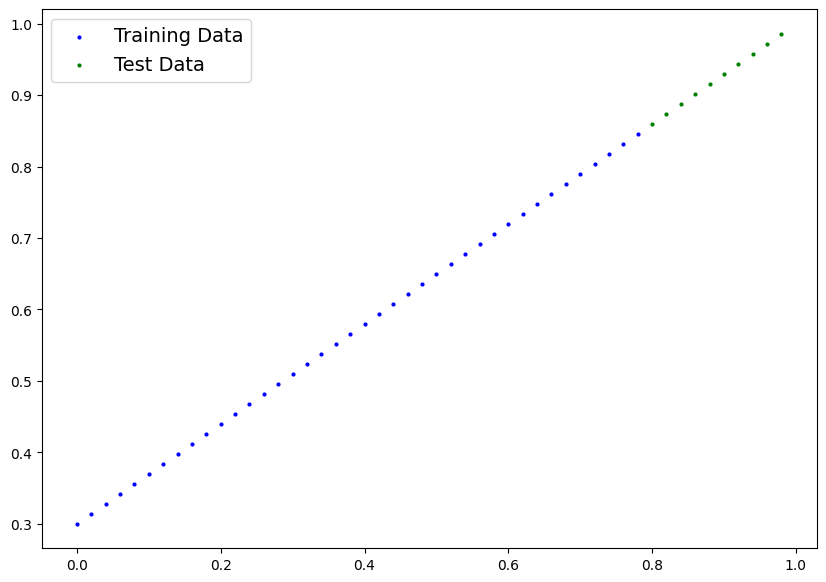

In [7]:
plot_predictions()

## 2. Building pytorch model

Getting familier with phthon classes we can go through : https://realpython.com/python3-object-oriented-programming/

What the followig model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (The weight and bias values we have used to create the data)

It is done using 2 algorithms
1. Gradient Descent - https://www.youtube.com/watch?v=IHZwWFHWa-w&t=2s
2. Backpropagation - https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [8]:
from torch import nn

In [9]:
# Creating a linear regression model class
"""
Subclass nn.Module contains all the building blocks for neural networks
"""
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    """
    Initialise model parameters to be used in various computations (these could)
    be different layers from torch.nn, single parameters, hard-coded values
    or functions)
    requires_grad=True means PyTorch will track the gradients of this specific
    parameter for use with torch.autograd and gradient descent(for many
    torch.nn modules, requires_grad=True is set by default)
    """
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    """
    Any subclass of nn.Module needs to override forward()
    (this defines the forward computation of the model)
    """
  def forward(self, x: torch.Tensor) -> torch.Tensor:  # '->' is to tell that this method returns torch.Tensor type object, here x is the input data which is our trainign data
    return(self.weights * x + self.bias)

## Some of the most important PyTorch model building essentials

* torch.nn -> contains the building blocks for computational graphs(neural networks)
* torch.nn.Parameter -> What parameters the model will try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Modules -> The base class for all the neural network modules. If you subclass it, you should overwrite forword
* torch.optim -> this is where the optimzers in PyTorch live.

* def forward() -> all nn.Module subclasses requires to overwrite the forward(), this method describes what the model computes.

For more info visit PyTorch Cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of the pytorch model

In [10]:
# Creating a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Creating an instance of the model
model_0 = LinearRegressionModel()

# Checking the parameters
model_0.parameters()

<generator object Module.parameters at 0x79809ad5f760>

In [11]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
weight, bias

(0.7, 0.3)

In [14]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [15]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

### Making prediction using `torch.inference_mode()`

inference_mode() makes the model predection faster because PyTorch does not keep track of the grad function during inference(which it does in training time)
More info: https://twitter.com/PyTorch/status/1437838231505096708?lang=en

In [16]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

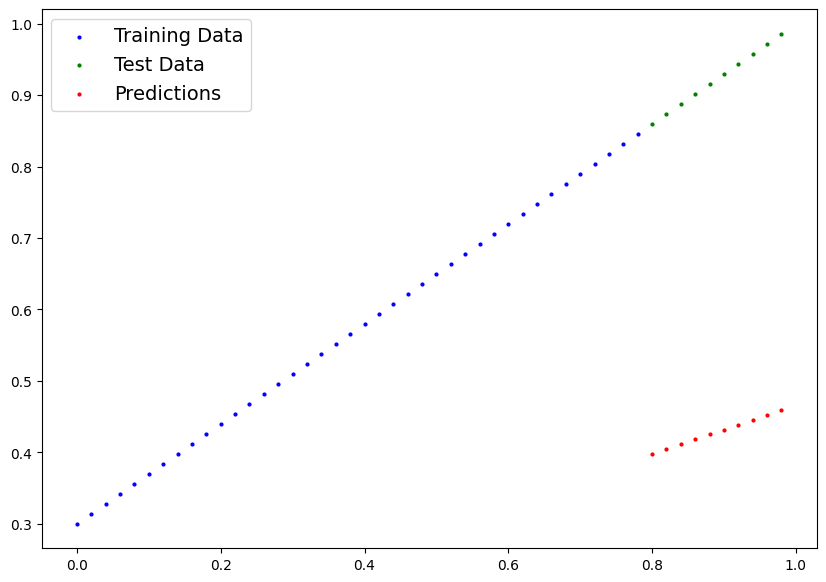

In [17]:
plot_predictions(predictions=y_preds)

## Training model

--> The model to move from some *unknown* parameters to *known* parameter

--> to check how bad the model is performing we should use a loss fuction

* Note: `Loss Function` also be called `cost function` or `criterion`

**Things we need to train during training**
* Loss Function: A function to measure how wrong the model's predections are. Lower the output value the better.
* Optimozer: Take into account the loss of a model and adjusts the model's parameters(e.g. weights & biases)

Specifically for pytorch we need:
* A training loop
* A testing loop

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# setup a loss_function
loss_fn = nn.L1Loss()

# setup an optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

**Which loss function and optimizer should we use ?**

--> It is problem specific. But with experience we can get idea about what works and what doesn't work with particular problem.
For Example: For a `regression` problem (like the one above), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.
But for a classification problem like `classifying` wether a photo is of a dog or a cat, you'll likely to use a loss function of `nn.BCELoss()` (Binary Cross Entropy Loss)

### Building a training loop and testing loop

**A Couple of things we need in a training loop:**
1. Loop through the data
2. Forward pass (This involvs data moving through our model's forword function) to make predictions - also called forward propagation
3. Calculate the loss (Compare forward pass predictions to ground truth labels)
4. Optimize zero grad.
5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with to the loss.(**Back propagation**) resource:https://www.youtube.com/watch?v=tIeHLnjs5U8
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve our loss(**Gradient Descent**) https://www.youtube.com/watch?v=IHZwWFHWa-w


In [20]:
# pytorch eval mode
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [21]:
torch.manual_seed(RANDOM_SEED)

# An epoch is one loop through the data (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 1. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode (pytorch has different modes)
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradient

  # 2. Forward Pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # 4. Optimizer zero grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss with respect to the prarmeters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step() # by default the optimizer changes will accumulate through the loop so we have to zero them above in step 3 for the next iteration fo the loop

  ### Testing (Evaluation)
  model_0.eval() # turns off gradient tracking (this turns off different settings in the model not needed for evaluation/testing) (disables things like dropouts, batch norm layers)
  with torch.inference_mode(): # This turns off gradient tracking and a couple of more things behind the scene which are not needed
  # with torch.no_grad(): # this can be seen in older PyTorch Code but torch.inference_mode() is faster
    # 1. Forward Pass
    test_pred = model_0(X_test)

    # 2. Calculate the test loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

  # Print model state dict
  print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3835])), ('bias', tenso

In [22]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

In [23]:
import numpy as np
np.array(torch.tensor(loss_values))
# or we can use the following if the tensor is in GPU
# np.array(torch.tensor(loss_values).cpu().numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

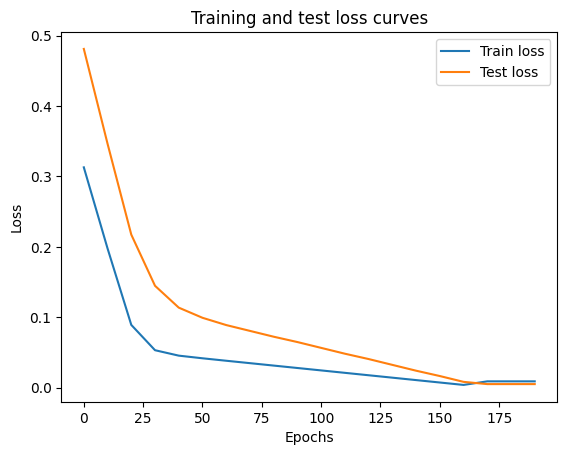

In [24]:
# Plotting loss curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values)), label= "Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [25]:
# performing predections
with torch.inference_mode():
  y_preds_new = model_0(X_test)

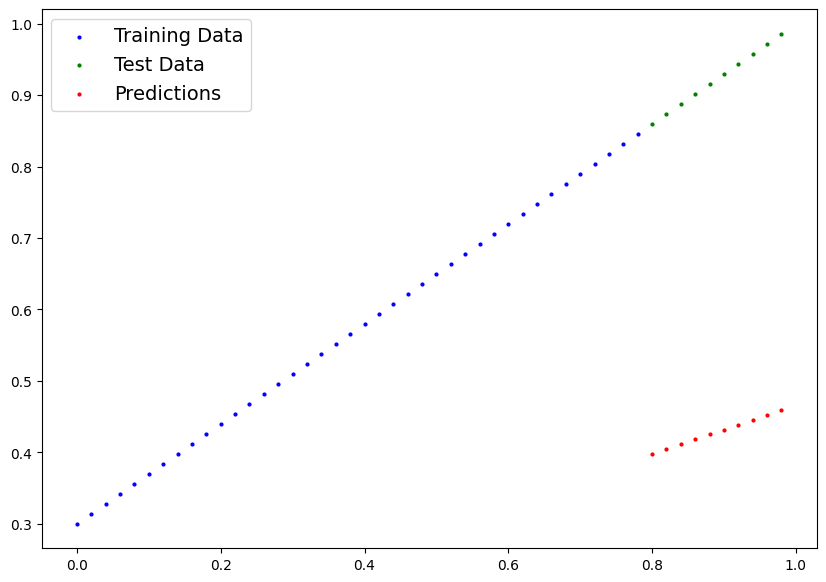

In [26]:
# Checking the older predections
plot_predictions(predictions=y_preds)

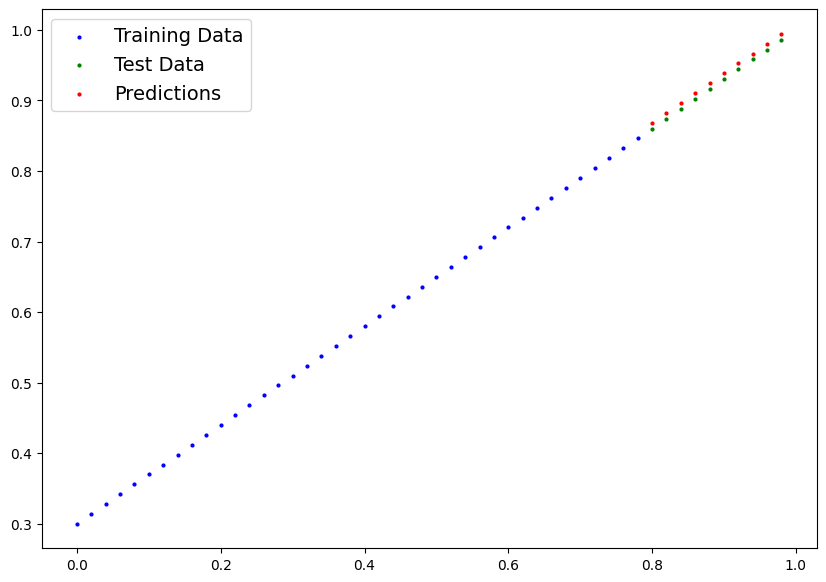

In [27]:
plot_predictions(predictions=y_preds_new)

In [28]:
new_loss = loss_fn(y_preds_new, y_test)
new_loss

tensor(0.0084)

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [30]:
weight, bias

(0.7, 0.3)

# Saving a model in PyTorch

There are three main ways to save a model in PyTorch:
* `torch.save()` - allows to save a pytorch object in python's pickle format
* `torch.load()` - allows to load a saved PyTorch object
* `torch.nn.Module.load_state_dict()` - allows to laod a model's saved state dictionary

Resource: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [31]:
# Save model
from pathlib import Path

In [33]:
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [36]:
# 3. Save the model save dict
print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

saving model to : models/01_pytorch_workflow_model_0.pth


In [37]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Feb  2 05:17 01_pytorch_workflow_model_0.pth


# Loading the saved model

Since only the `model's state dict` is saved not he entire model so we'll create a new instance of our model calss and load the `saved state_dict`

In [41]:
# Instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (This will update the instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [42]:
# for comparison
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [39]:
# loaded model state dict before instentiation
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [43]:
# making predictions with our loaded model
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [44]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# PUTTING IT ALL TOGETHER:

In [45]:
# Importing all essential libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

# Checking the torch version
torch.__version__

'2.1.0+cu121'

In [46]:
# Creating device agnostic code (If we have gpu the code will use it, else cpu will be use)
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Device Used: {device}")

Device Used: cpu


In [48]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Data

In [165]:
# Creating dummy dataset
weight = 0.9
bias = 0.5

# creating range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.5000],
         [0.5180],
         [0.5360],
         [0.5540],
         [0.5720],
         [0.5900],
         [0.6080],
         [0.6260],
         [0.6440],
         [0.6620]]))

In [166]:
# splitting data
train_split = int(len(X) * 0.8)
X_train_new, y_train_new = X[:train_split], y[:train_split]
X_test_new, y_test_new = X[train_split:], y[train_split:]

len(X_train_new), len(y_train_new), len(X_test_new), len(y_test_new)

(40, 40, 10, 10)

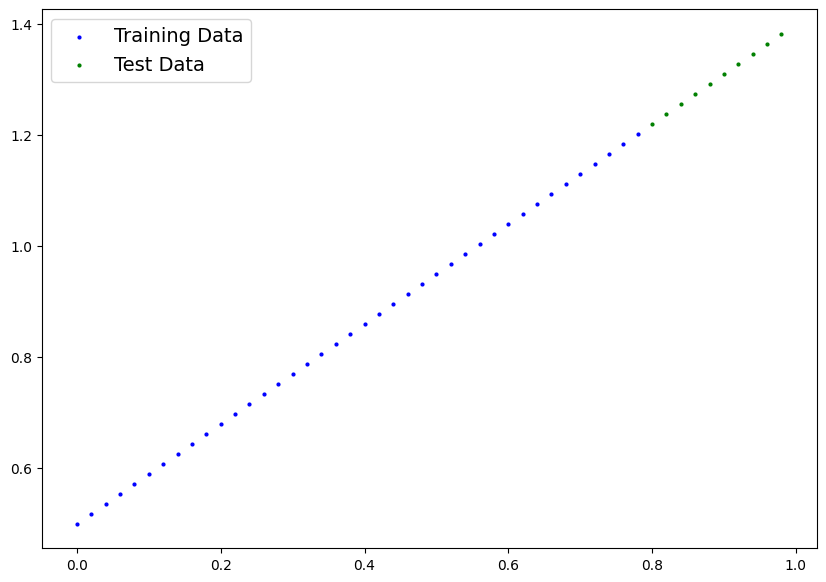

In [167]:
# plot the data
# Run plot_predictions() function cell before running this cell
plot_predictions(X_train_new, y_train_new, X_test_new, y_test_new)

## Building a PyTorch linear model

In [142]:
# Creating a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:   # x should be a torch.Tensor and forward function should return(->) torch.Tensor data (This is python's type hint)
    return self.linear_layer(x)

# Setting manual seed
torch.manual_seed(RANDOM_SEED)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [143]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [144]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [145]:
# creating my own iterater for learner purpose not related to this module
def my_iter(l):
  for value in l:
    yield value

In [146]:
array = [1, 4, 5, 6]
# my_val = iter(array) # we can directly use the iter function to convert a list into an iterator
# next(my_val)

my_it = my_iter(array)
next(my_it)

1

In [147]:
next(my_it)

4

## Training

* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [186]:
# setting up loss function
loss_fn = nn.L1Loss()

# setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.001, momentum=0.9)

# Putting data on to the target device as the model is already in target device
if Both data and model are not in the same device errors might come

In [187]:
# Device agnostic code for data
X_train_new = X_train_new.to(device)
y_train_new = y_train_new.to(device)
X_test_new = X_test_new.to(device)
y_test_new = y_test_new.to(device)

In [188]:
# Training Loop
torch.manual_seed(RANDOM_SEED)

epochs = 80

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred_new = model_1(X_train_new)

  # 2. Calculate the loss
  loss = loss_fn(y_pred_new, y_train_new)

  # 3. Optimize the zero grad
  optimizer.zero_grad()

  # 4. Performing back propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Model evaluation for training loop
  model_1.eval()
  with torch.inference_mode():  # setting inference_mode context manager
    test_pred_new = model_1(X_test_new)

    test_loss_new = loss_fn(test_pred_new, y_test_new)

  # Print output
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Training Loss: {loss} | Validation Loss: {test_loss}")



Epoch: 0 | Training Loss: 0.00640667462721467 | Validation Loss: 0.009031307883560658
Epoch: 10 | Training Loss: 0.0031417845748364925 | Validation Loss: 0.009031307883560658
Epoch: 20 | Training Loss: 0.0001323692558798939 | Validation Loss: 0.009031307883560658
Epoch: 30 | Training Loss: 0.0030147358775138855 | Validation Loss: 0.009031307883560658
Epoch: 40 | Training Loss: 0.00030997247085906565 | Validation Loss: 0.009031307883560658
Epoch: 50 | Training Loss: 0.0009064450860023499 | Validation Loss: 0.009031307883560658
Epoch: 60 | Training Loss: 0.0011525570880621672 | Validation Loss: 0.009031307883560658
Epoch: 70 | Training Loss: 0.0004385419306345284 | Validation Loss: 0.009031307883560658


In [189]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9003]])),
             ('linear_layer.bias', tensor([0.5006]))])

In [190]:
weight, bias

(0.9, 0.5)

### Making predections and plotting

In [191]:
# Turn the model into evalustion mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds_new = model_1(X_test_new)
y_preds_new

tensor([[1.2208],
        [1.2389],
        [1.2569],
        [1.2749],
        [1.2929],
        [1.3109],
        [1.3289],
        [1.3469],
        [1.3649],
        [1.3829]])

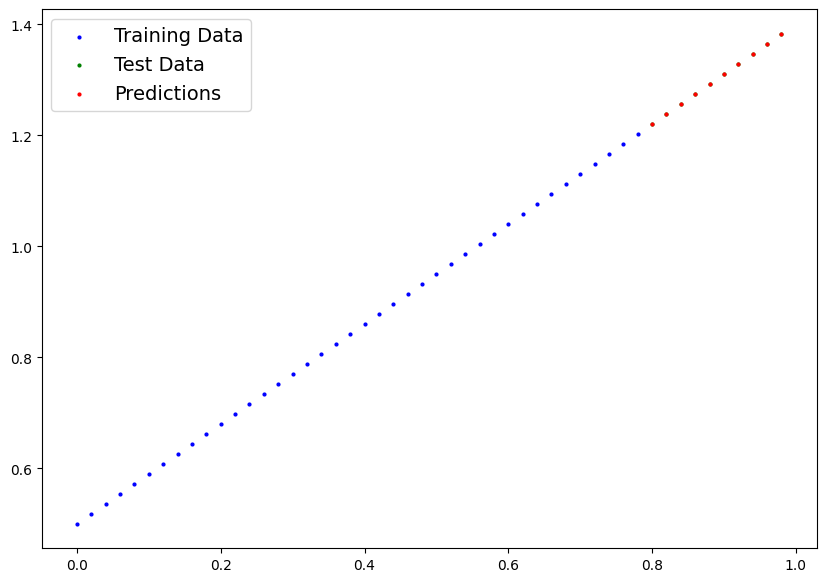

In [192]:
plot_predictions(train_data = X_train_new,
                 train_labels = y_train_new,
                 test_data = X_test_new,
                 test_labels = y_test_new,
                 predictions=y_preds_new)

# Saving ans loading the trained model

In [193]:
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"Saved model {MODEL_SAVE_PATH}")

Saved model models/01_pytorch_workflow_model_1.pth


In [194]:
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [195]:
# Load a PyTorch model

# create new instance of Linerar regression model v2
loaded_model_1 = LinearRegressionModelV2()

# Loading state dict of the model instead of loading the complete model
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# putting the model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [196]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [197]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9003]])),
             ('linear_layer.bias', tensor([0.5006]))])

In [198]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds_new == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])